<a href="https://colab.research.google.com/github/ymuto0302/RW2025/blob/main/decisiontree_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 決定木を用いたIrisデータセットの分類と可視化

## 環境設定とデータ準備：

In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Irisデータセットの読み込み
iris = load_iris()
X, y = iris.data, iris.target

# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 決定木モデルの構築と評価：

In [6]:
# モデルの構築
model= DecisionTreeClassifier(max_depth=7)
model.fit(X_train, y_train)

# 予測と評価
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



## 決定木の可視化：

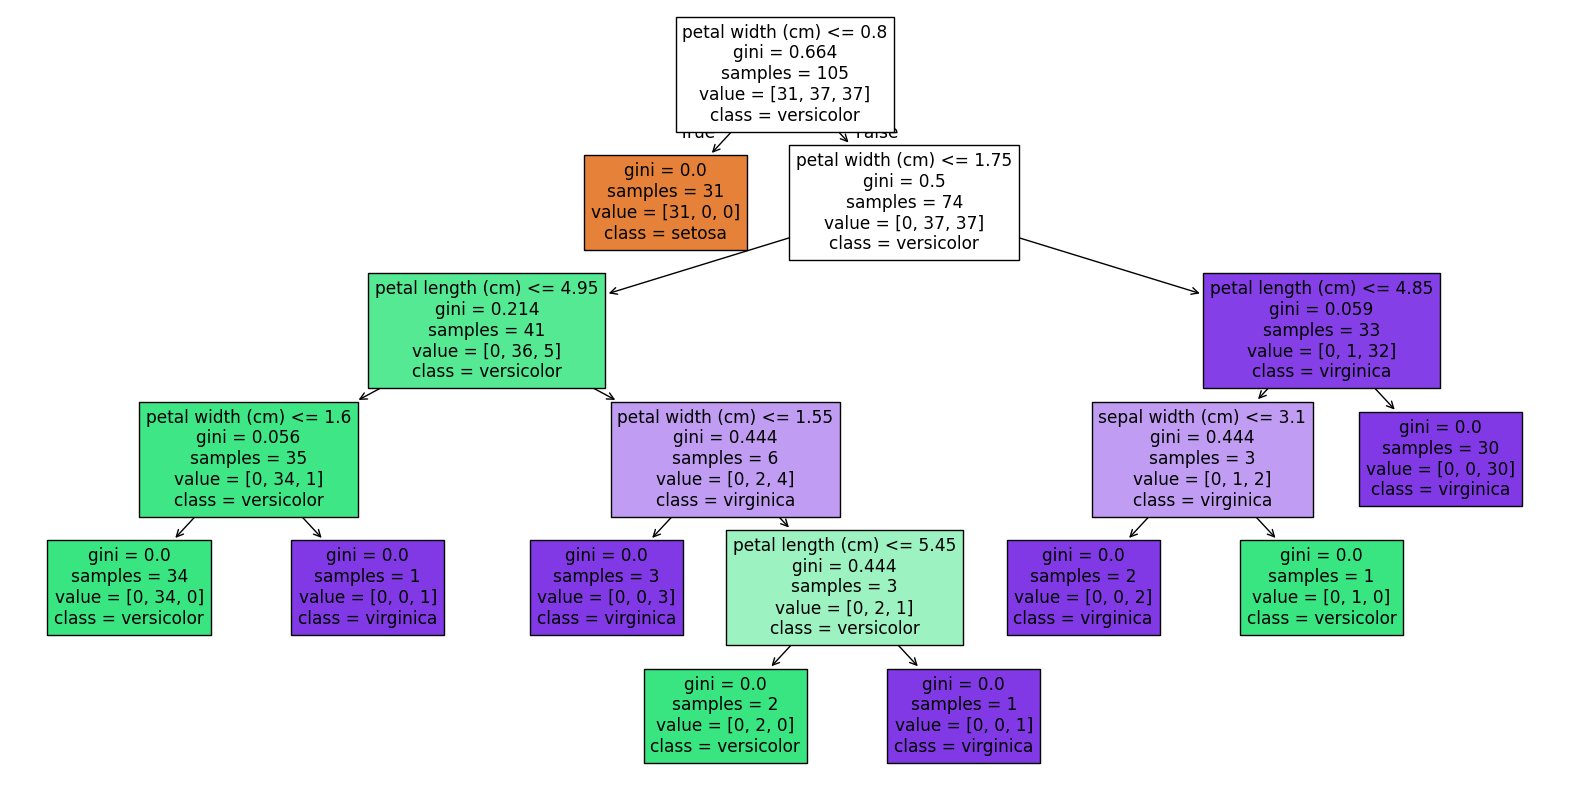

In [7]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(model, feature_names=iris.feature_names,
          class_names=iris.target_names, filled=True)
plt.show()

## 決定木の深さによる性能変化：

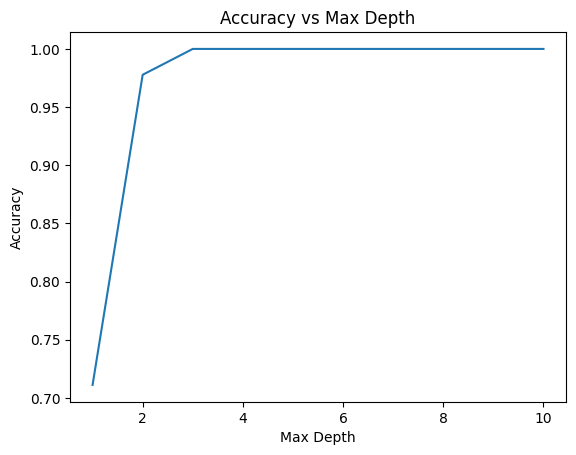

In [8]:
max_depths = range(1, 11)
accuracies = []

for depth in max_depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.plot(max_depths, accuracies)
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth')
plt.show()